# Machine hack flight price prediction 

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Huh! Here we take on the challenge! As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

In [19]:
#Load important LIB
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pandas_profiling

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

In [2]:
#Read the train and test file
train = pd.read_excel("Data_Train.xlsx", parse_dates=[1,7])
test = pd.read_excel("Test_set.xlsx", parse_dates=[1])

In [3]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [5]:
pandas_profiling.ProfileReport(train)

Number of variables,11
Number of observations,10683
Total Missing (%),0.0%
Total size in memory,918.1 KiB
Average record size in memory,88.0 B
Numeric,1
Categorical,9
Boolean,0
Date,1
Text (Unique),0
Rejected,0


Observations :
    Dataset has 220 duplicate rows 

# Remove the duplicates rows

In [6]:
train.shape

(10683, 11)

In [7]:
train.drop_duplicates(keep=False,inplace=True)
train.shape

(10268, 11)

We need to replace New Delhi with Delhi as both are the same one only .

In [8]:
train['Destination'].value_counts()
cleanup = {'New Delhi':'Delhi'}
train['Source'] = train['Source'].replace(cleanup,regex=True)
train['Destination'] = train['Destination'].replace(cleanup,regex=True)
train['Destination'].value_counts()
train['Source'].value_counts()

Delhi       4179
Kolkata     2850
Banglore    2161
Mumbai       697
Chennai      381
Name: Source, dtype: int64

# Flight price distribution

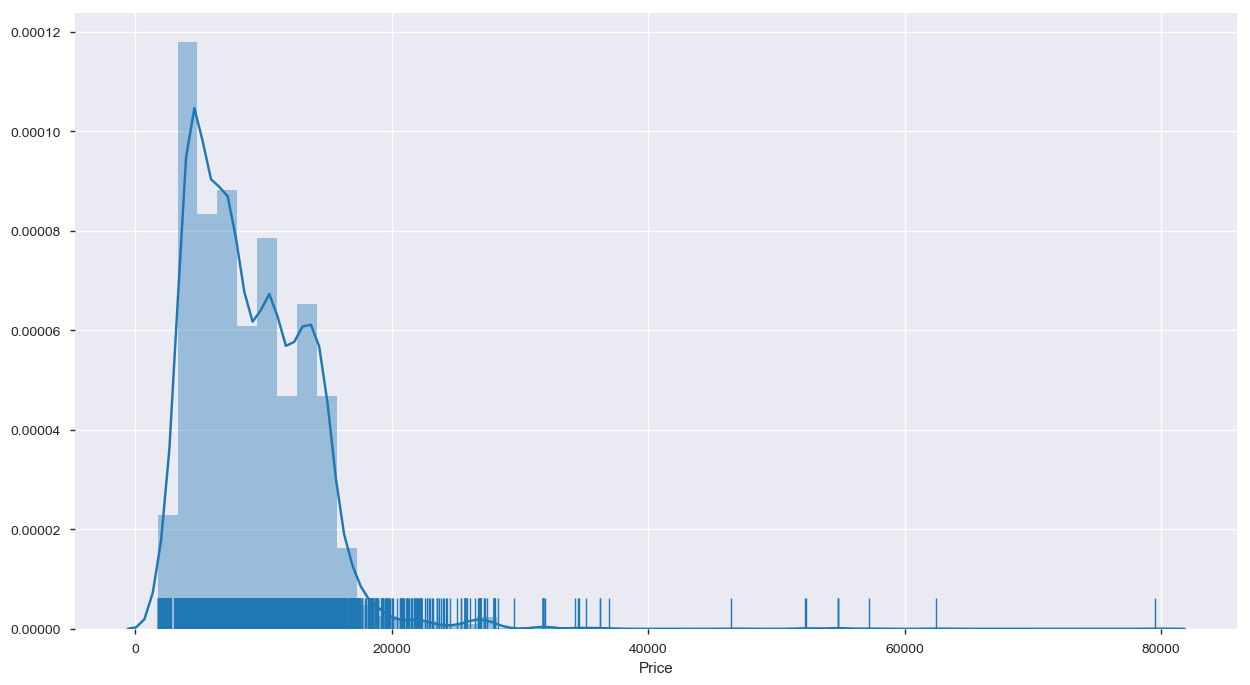

In [9]:

plt.figure(figsize=(15,8))
d1 = sns.distplot(train['Price'],rug=True)

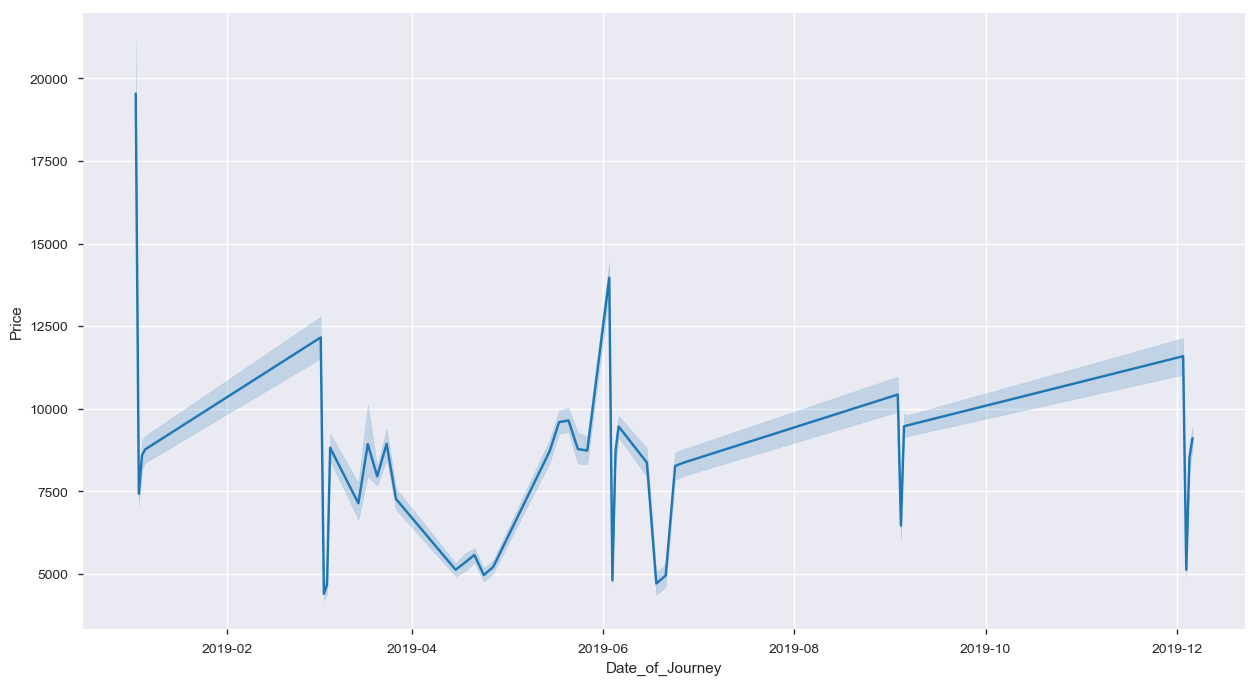

In [10]:
plt.figure(figsize=(15,8))
l1 = sns.lineplot(x=train['Date_of_Journey'],y=train['Price'],data=train)

Let's look at flight price across date , depending upon the number of stop. Since flight with more stop will be more costly.Let's verify our assumption.

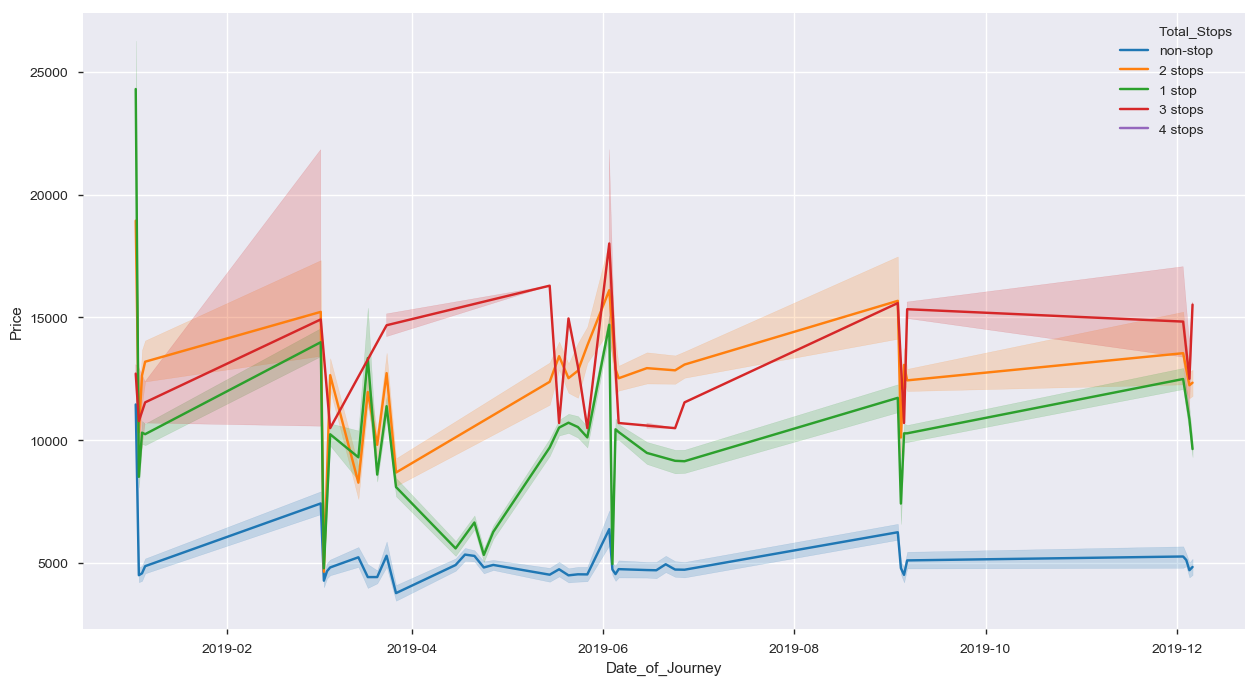

In [11]:
plt.figure(figsize=(15,8))
l1 = sns.lineplot(x=train['Date_of_Journey'],y=train['Price'],hue='Total_Stops',data=train)


Let's use box plot to see better picture for the same.

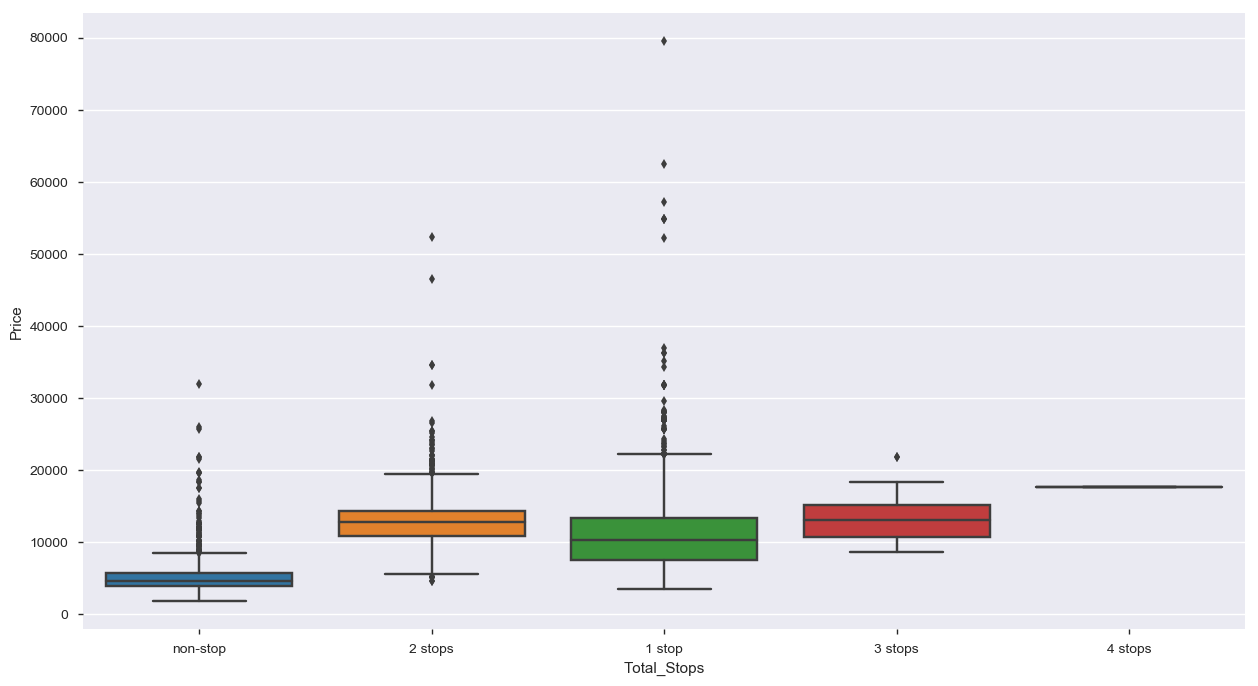

In [12]:
plt.figure(figsize=(15,8))
l1 = sns.boxplot(y='Price',x='Total_Stops',data=train)


Observations:
    1.Non-stop flight price are cheaper in comparision to 1,2and 3 stops flight price.

# Flight price w.r.t Airline 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

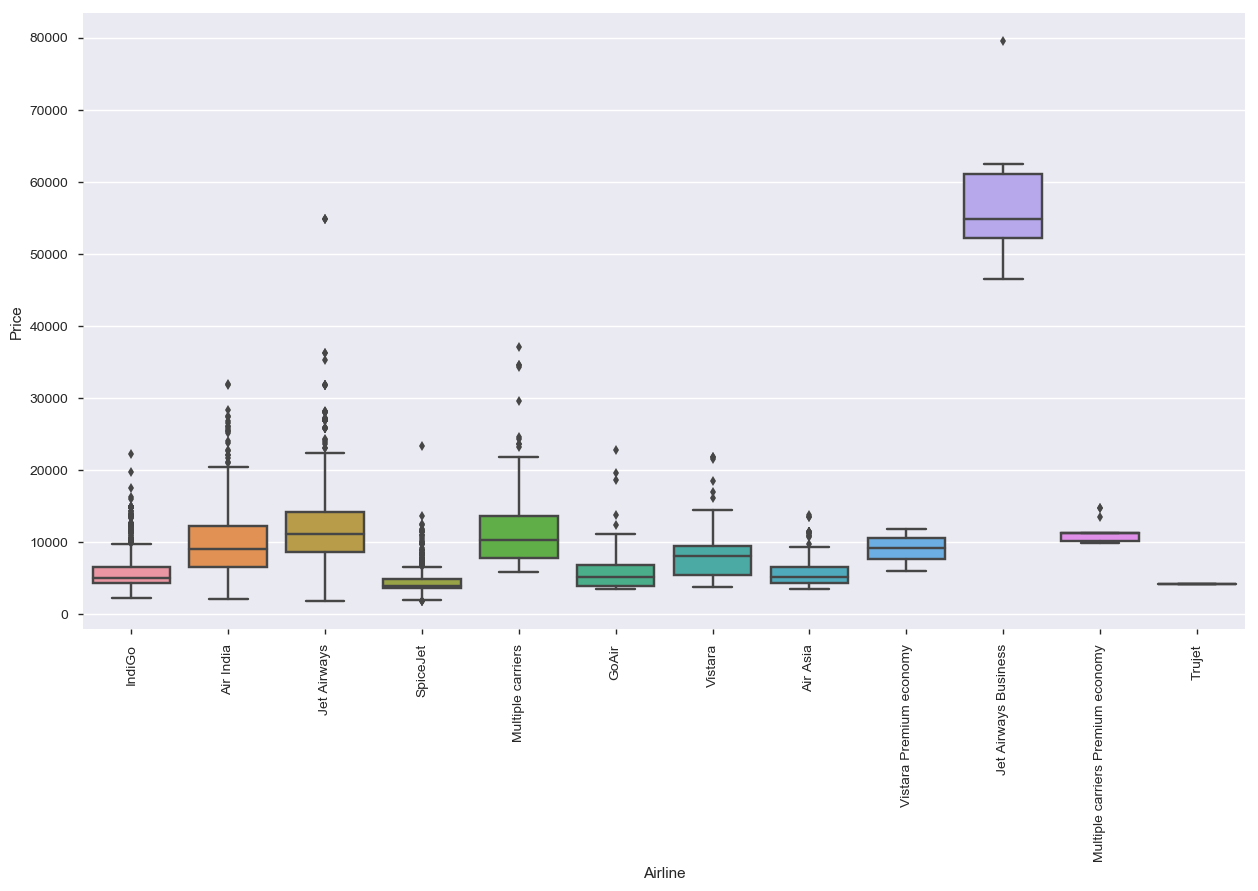

In [13]:
plt.figure(figsize=(15,8))
l1 = sns.boxplot(y='Price',x='Airline',data=train)
plt.xticks(rotation=90)

Jet Airways Business prices are more costlier comaparision to all other flight.
And spicejet flight prices are less .

# Flight price w.r.t Source

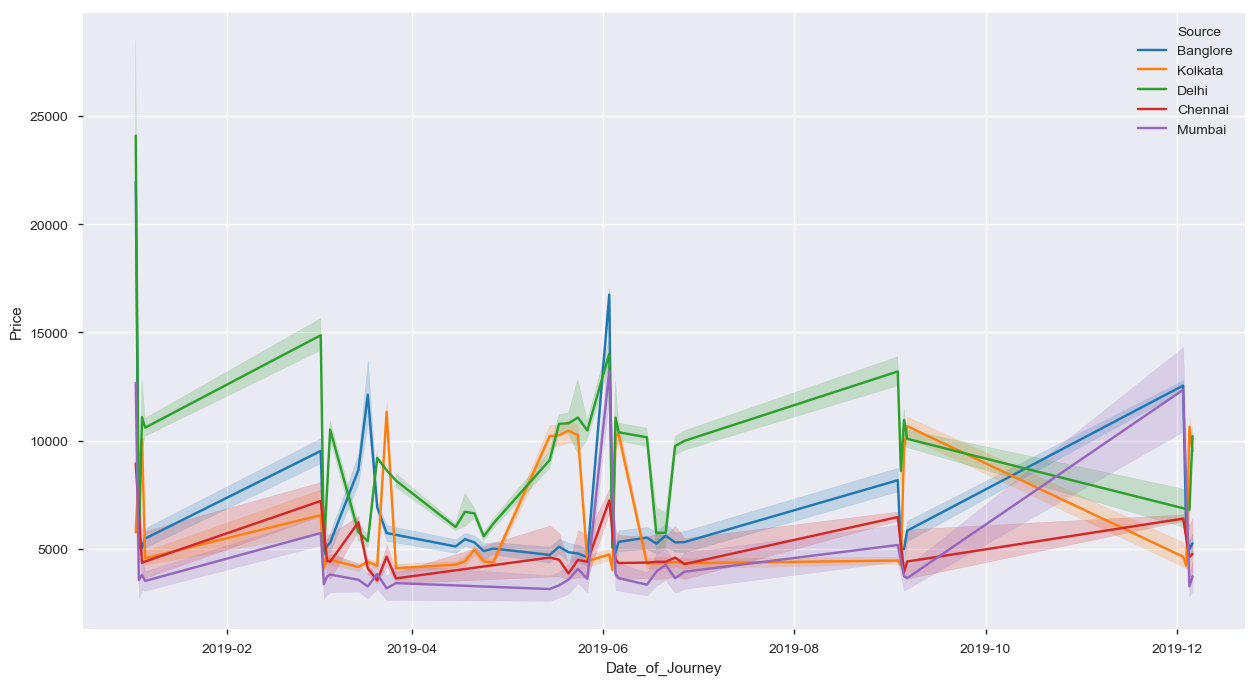

In [14]:
plt.figure(figsize=(15,8))
l1 = sns.lineplot(x=train['Date_of_Journey'],y=train['Price'],hue='Source',data=train)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

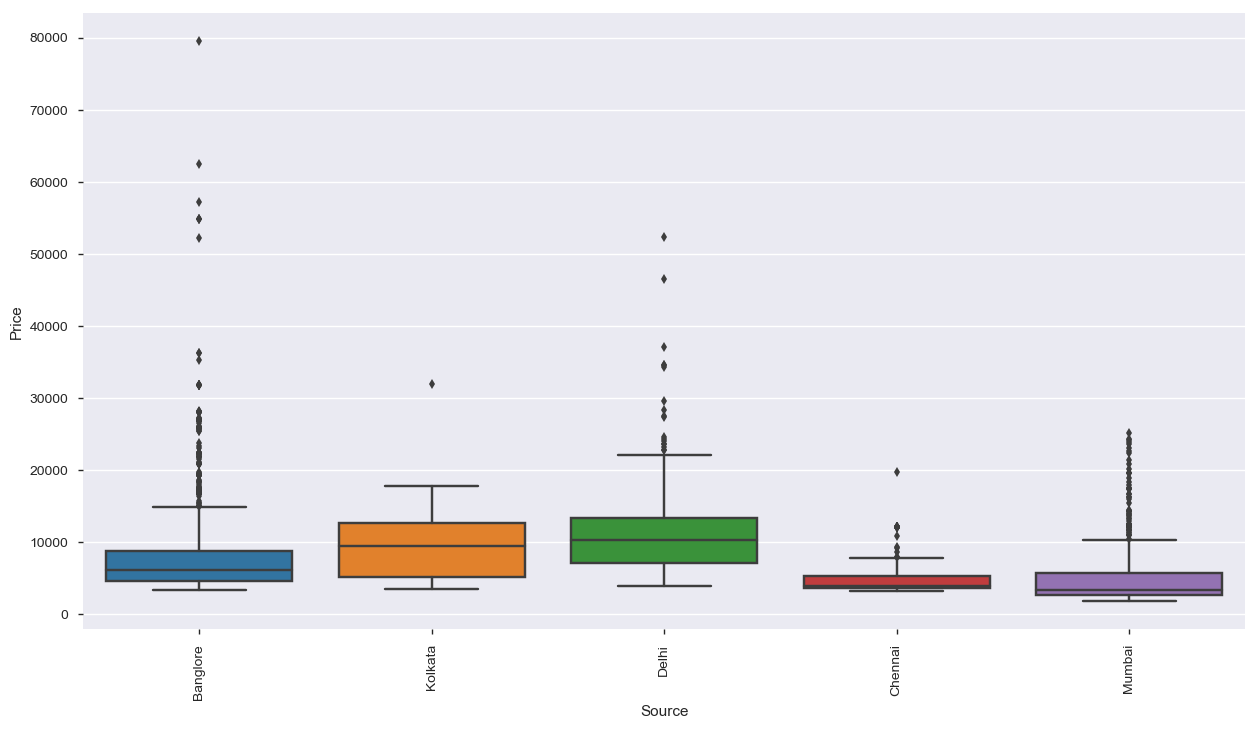

In [15]:
plt.figure(figsize=(15,8))
l1 = sns.boxplot(x='Source',y='Price',data=train)
plt.xticks(rotation=90)

# Flight price w.r.t Destination

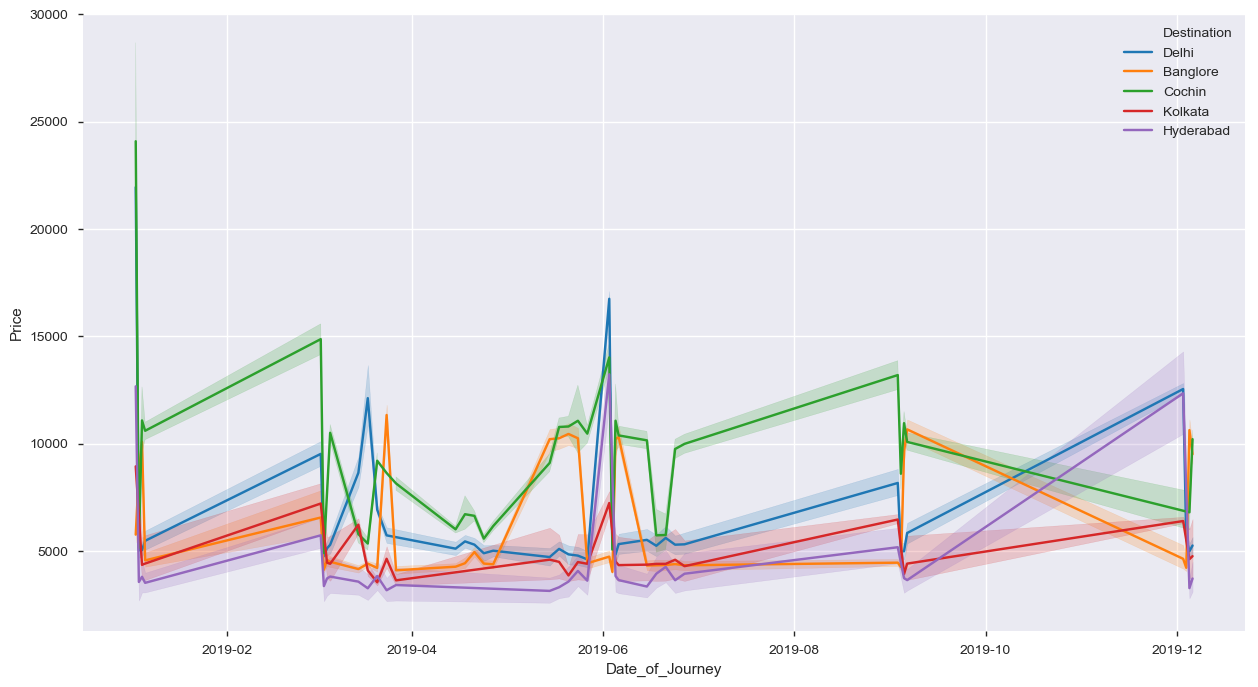

In [16]:
plt.figure(figsize=(15,8))
l1 = sns.lineplot(x=train['Date_of_Journey'],y=train['Price'],hue='Destination',data=train)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

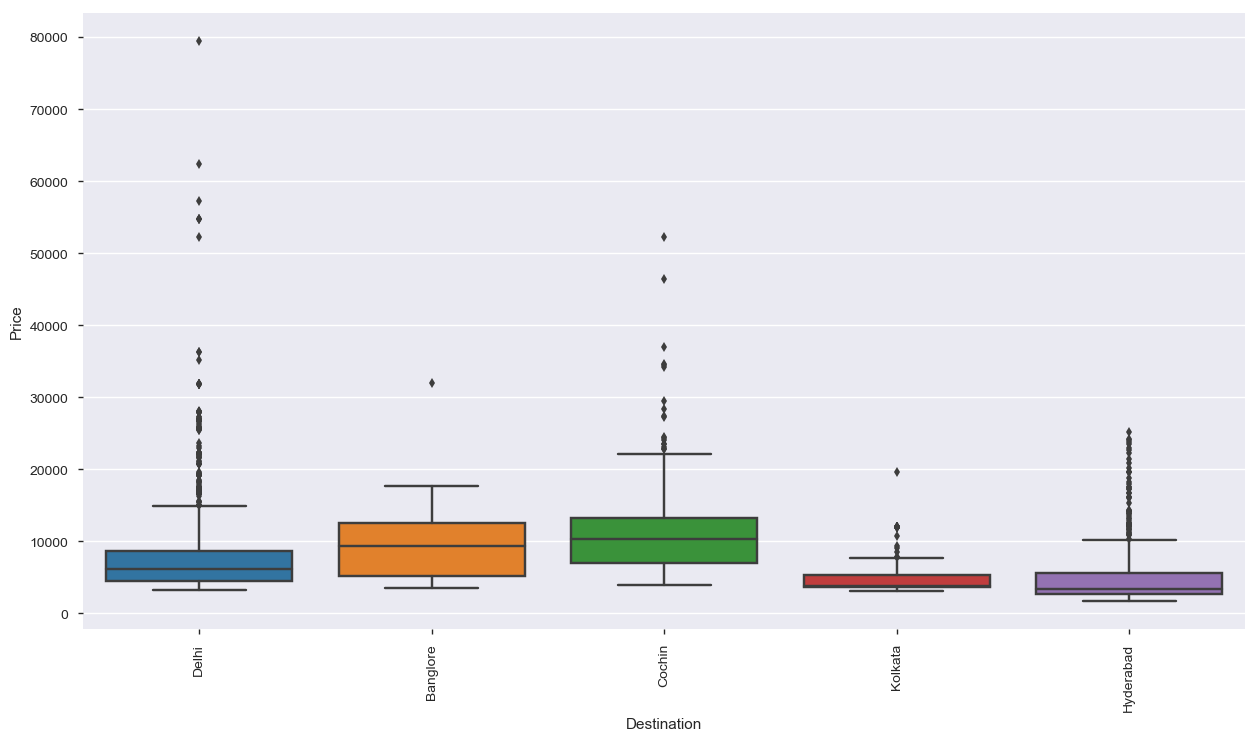

In [17]:
plt.figure(figsize=(15,8))
l1 = sns.boxplot(x='Destination',y='Price',data=train)
plt.xticks(rotation=90)

Price for destination Kolkata is compartively less compare to all other destination place for Airline